<a href="https://colab.research.google.com/github/siontama/Data-Science/blob/master/Deep%20Learning%20with%20Python/4_4_overfitting_and_underfitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.datasets import imdb
import numpy as np

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results
  
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

Using TensorFlow backend.


In [2]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
smaller_model = models.Sequential()
smaller_model.add(layers.Dense(6, activation='relu', input_shape=(10000,)))
smaller_model.add(layers.Dense(6, activation='relu'))
smaller_model.add(layers.Dense(1, activation='sigmoid'))

smaller_model.compile(optimizer='rmsprop',
                      loss='binary_crossentropy',
                      metrics=['acc'])

In [4]:
original_hist = model.fit(x_train, y_train,
                          epochs=20,
                          batch_size=512,
                          validation_data=(x_test, y_test))

Instructions for updating:
Use tf.cast instead.
Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 5s 214us/step - loss: 0.4439 - acc: 0.8243 - val_loss: 0.3289 - val_acc: 0.8845
Epoch 2/20
25000/25000 [==============================] - 5s 200us/step - loss: 0.2575 - acc: 0.9080 - val_loss: 0.2862 - val_acc: 0.8885
Epoch 3/20
25000/25000 [==============================] - 5s 200us/step - loss: 0.1991 - acc: 0.9288 - val_loss: 0.2822 - val_acc: 0.8885
Epoch 4/20
25000/25000 [==============================] - 5s 201us/step - loss: 0.1662 - acc: 0.9419 - val_loss: 0.2941 - val_acc: 0.8841
Epoch 5/20
25000/25000 [==============================] - 5s 202us/step - loss: 0.1423 - acc: 0.9506 - val_loss: 0.3122 - val_acc: 0.8805
Epoch 6/20
25000/25000 [==============================] - 5s 201us/step - loss: 0.1243 - acc: 0.9563 - val_loss: 0.3517 - val_acc: 0.8720
Epoch 7/20
25000/25000 [==============================] - 5s 201us/step - 

In [5]:
smaller_model_hist = smaller_model.fit(x_train, y_train,
                                       epochs=20,
                                       batch_size=512,
                                       validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 5s 194us/step - loss: 0.5658 - acc: 0.7403 - val_loss: 0.4804 - val_acc: 0.8310
Epoch 2/20
25000/25000 [==============================] - 5s 185us/step - loss: 0.3872 - acc: 0.8898 - val_loss: 0.3570 - val_acc: 0.8790
Epoch 3/20
25000/25000 [==============================] - 5s 184us/step - loss: 0.2762 - acc: 0.9177 - val_loss: 0.3006 - val_acc: 0.8876
Epoch 4/20
25000/25000 [==============================] - 5s 185us/step - loss: 0.2208 - acc: 0.9282 - val_loss: 0.2830 - val_acc: 0.8892
Epoch 5/20
25000/25000 [==============================] - 5s 185us/step - loss: 0.1886 - acc: 0.9368 - val_loss: 0.2815 - val_acc: 0.8868
Epoch 6/20
25000/25000 [==============================] - 5s 184us/step - loss: 0.1664 - acc: 0.9443 - val_loss: 0.2855 - val_acc: 0.8854
Epoch 7/20
25000/25000 [==============================] - 5s 183us/step - loss: 0.1487 - acc: 0.9510 - val_loss: 0.2948 - 

In [0]:
epochs = range(1, 21)
original_val_loss = original_hist.history['val_loss']
smaller_model_val_loss = smaller_model_hist.history['val_loss']

In [0]:
import matplotlib.pyplot as plt

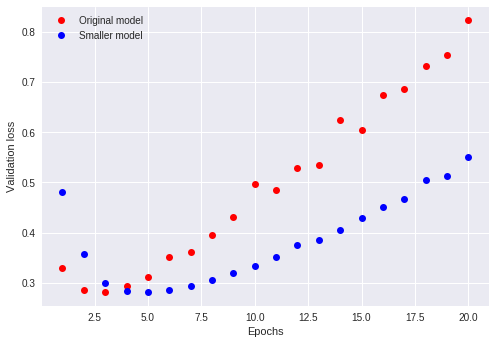

In [10]:

# ‘b+’는 파란색 덧셈 기호을 의미합니다
plt.plot(epochs, original_val_loss, 'ro', label='Original model')
# ‘bo’는 파란색 점을 의미합니다
plt.plot(epochs, smaller_model_val_loss, 'bo', label='Smaller model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

In [0]:
bigger_model = models.Sequential()
bigger_model.add(layers.Dense(1024, activation='relu', input_shape=(10000,)))
bigger_model.add(layers.Dense(1024, activation='relu'))
bigger_model.add(layers.Dense(1, activation='sigmoid'))

bigger_model.compile(optimizer='rmsprop',
                     loss='binary_crossentropy',
                     metrics=['acc'])

In [15]:
bigger_model_hist = bigger_model.fit(x_train, y_train,
                                     epochs=20,
                                     batch_size=512,
                                     validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 43s 2ms/step - loss: 0.5179 - acc: 0.7894 - val_loss: 0.3159 - val_acc: 0.8689
Epoch 2/20
25000/25000 [==============================] - 40s 2ms/step - loss: 0.2214 - acc: 0.9122 - val_loss: 0.2861 - val_acc: 0.8870
Epoch 3/20
25000/25000 [==============================] - 40s 2ms/step - loss: 0.1137 - acc: 0.9566 - val_loss: 0.3469 - val_acc: 0.8832
Epoch 4/20
25000/25000 [==============================] - 40s 2ms/step - loss: 0.0588 - acc: 0.9813 - val_loss: 0.4311 - val_acc: 0.8807
Epoch 5/20
25000/25000 [==============================] - 40s 2ms/step - loss: 0.0684 - acc: 0.9886 - val_loss: 0.4543 - val_acc: 0.8794
Epoch 6/20
25000/25000 [==============================] - 41s 2ms/step - loss: 0.0019 - acc: 0.9998 - val_loss: 0.6439 - val_acc: 0.8771
Epoch 7/20
25000/25000 [==============================] - 41s 2ms/step - loss: 0.1018 - acc: 0.9865 - val_loss: 0.6361 - val_acc

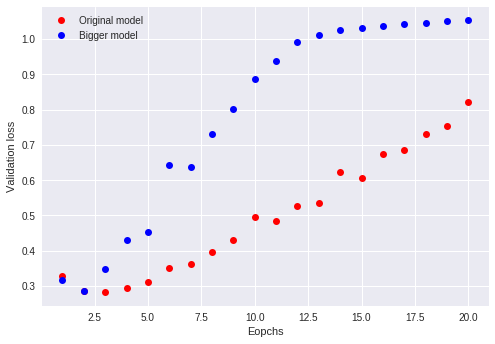

In [17]:
bigger_model_val_loss = bigger_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'ro', label='Original model')
plt.plot(epochs, bigger_model_val_loss, 'bo', label='Bigger model')
plt.xlabel('Eopchs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

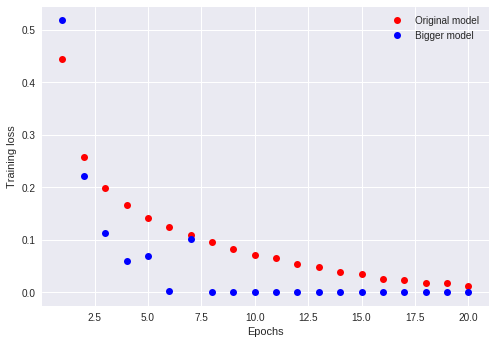

In [18]:
original_train_loss = original_hist.history['loss']
bigger_model_train_loss = bigger_model_hist.history['loss']

plt.plot(epochs, original_train_loss, 'ro', label='Original model')
plt.plot(epochs, bigger_model_train_loss, 'bo', label='Bigger model')
plt.xlabel('Epochs')
plt.ylabel('Training loss')
plt.legend()

plt.show()

In [0]:
from keras import regularizers

l2_model = models.Sequential()
l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
                          activation='relu', input_shape=(10000,)))
l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.0001),
                          activation='relu'))
l2_model.add(layers.Dense(1, activation='sigmoid'))

In [0]:
l2_model.compile(optimizer='rmsprop',
                 loss='binary_crossentropy',
                 metrics=['acc'])

In [21]:
l2_model_hist = l2_model.fit(x_train, y_train,
                             epochs=20,
                             batch_size=512,
                             validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 6s 247us/step - loss: 0.4721 - acc: 0.8162 - val_loss: 0.3731 - val_acc: 0.8660
Epoch 2/20
25000/25000 [==============================] - 5s 190us/step - loss: 0.2940 - acc: 0.9060 - val_loss: 0.3153 - val_acc: 0.8891
Epoch 3/20
25000/25000 [==============================] - 5s 190us/step - loss: 0.2488 - acc: 0.9211 - val_loss: 0.3161 - val_acc: 0.8866
Epoch 4/20
25000/25000 [==============================] - 5s 190us/step - loss: 0.2292 - acc: 0.9298 - val_loss: 0.3266 - val_acc: 0.8823
Epoch 5/20
25000/25000 [==============================] - 5s 189us/step - loss: 0.2152 - acc: 0.9358 - val_loss: 0.3698 - val_acc: 0.8678
Epoch 6/20
25000/25000 [==============================] - 5s 191us/step - loss: 0.2064 - acc: 0.9393 - val_loss: 0.3564 - val_acc: 0.8745
Epoch 7/20
25000/25000 [==============================] - 5s 190us/step - loss: 0.1992 - acc: 0.9421 - val_loss: 0.3699 - 

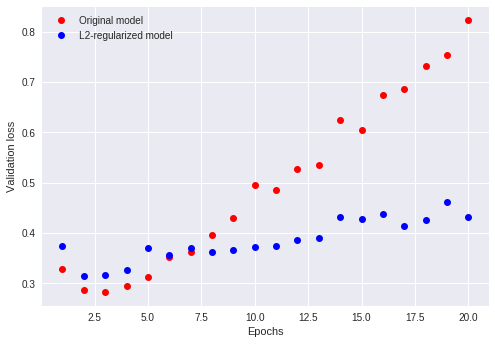

In [22]:
l2_model_val_loss = l2_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'ro', label='Original model')
plt.plot(epochs, l2_model_val_loss, 'bo', label='L2-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

In [0]:
l1_model = models.Sequential()
l1_model.add(layers.Dense(16, kernel_regularizer=regularizers.l1(0.0001),
                          activation='relu', input_shape=(10000,)))
l1_model.add(layers.Dense(16, kernel_regularizer=regularizers.l1(0.0001),
                          activation='relu'))
l1_model.add(layers.Dense(1, activation='sigmoid'))

In [0]:
l1_model.compile(optimizer='rmsprop',
                 loss='binary_crossentropy',
                 metrics=['acc'])

In [25]:
l1_model_hist = l1_model.fit(x_train, y_train,
                             epochs=20,
                             batch_size=512,
                             validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 6s 247us/step - loss: 0.5501 - acc: 0.8254 - val_loss: 0.4251 - val_acc: 0.8734
Epoch 2/20
25000/25000 [==============================] - 5s 191us/step - loss: 0.3637 - acc: 0.8955 - val_loss: 0.3719 - val_acc: 0.8853
Epoch 3/20
25000/25000 [==============================] - 5s 189us/step - loss: 0.3269 - acc: 0.9053 - val_loss: 0.3760 - val_acc: 0.8760
Epoch 4/20
25000/25000 [==============================] - 5s 191us/step - loss: 0.3056 - acc: 0.9140 - val_loss: 0.3529 - val_acc: 0.8880
Epoch 5/20
25000/25000 [==============================] - 5s 189us/step - loss: 0.2952 - acc: 0.9174 - val_loss: 0.3576 - val_acc: 0.8860
Epoch 6/20
25000/25000 [==============================] - 5s 190us/step - loss: 0.2881 - acc: 0.9200 - val_loss: 0.3916 - val_acc: 0.8728
Epoch 7/20
25000/25000 [==============================] - 5s 188us/step - loss: 0.2791 - acc: 0.9245 - val_loss: 0.3872 - 

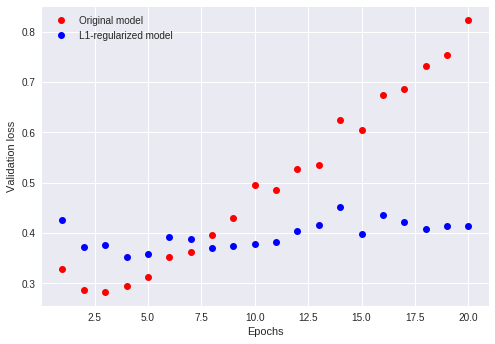

In [26]:
l1_model_val_loss = l1_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'ro', label='Original model')
plt.plot(epochs, l1_model_val_loss, 'bo', label='L1-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

In [0]:
l1l2_model = models.Sequential()
l1l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l1_l2(l1=0.0001, l2=0.0001),
                            activation='relu', input_shape=(10000,)))
l1l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l1_l2(l1=0.0001, l2=0.0002),
                            activation='relu'))
l1l2_model.add(layers.Dense(1, activation='sigmoid'))

In [0]:
l1l2_model.compile(optimizer='rmsprop',
                   loss='binary_crossentropy',
                   metrics=['acc'])

In [29]:
l1l2_model_hist = l1l2_model.fit(x_train, y_train,
                                 epochs=20,
                                 batch_size=512,
                                 validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 6s 236us/step - loss: 0.5555 - acc: 0.8154 - val_loss: 0.4348 - val_acc: 0.8659
Epoch 2/20
25000/25000 [==============================] - 5s 191us/step - loss: 0.3737 - acc: 0.8942 - val_loss: 0.3860 - val_acc: 0.8822
Epoch 3/20
25000/25000 [==============================] - 5s 189us/step - loss: 0.3369 - acc: 0.9056 - val_loss: 0.3798 - val_acc: 0.8823
Epoch 4/20
25000/25000 [==============================] - 5s 190us/step - loss: 0.3249 - acc: 0.9086 - val_loss: 0.3664 - val_acc: 0.8870
Epoch 5/20
25000/25000 [==============================] - 5s 190us/step - loss: 0.3125 - acc: 0.9141 - val_loss: 0.3900 - val_acc: 0.8762
Epoch 6/20
25000/25000 [==============================] - 5s 193us/step - loss: 0.3067 - acc: 0.9171 - val_loss: 0.3748 - val_acc: 0.8850
Epoch 7/20
25000/25000 [==============================] - 5s 192us/step - loss: 0.2989 - acc: 0.9187 - val_loss: 0.3737 - 

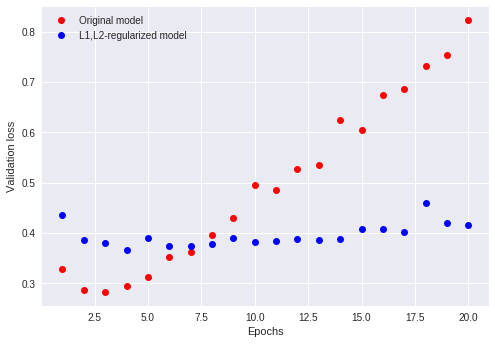

In [31]:
l1l2_model_val_loss = l1l2_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'ro', label='Original model')
plt.plot(epochs, l1l2_model_val_loss, 'bo', label='L1,L2-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

In [0]:
dpt_model = models.Sequential()
dpt_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
dpt_model.add(layers.Dropout(0.5))
dpt_model.add(layers.Dense(16, activation='relu'))
dpt_model.add(layers.Dropout(0.5))
dpt_model.add(layers.Dense(1, activation='sigmoid'))

dpt_model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['acc'])

In [34]:
dpt_model_hist = dpt_model.fit(x_train, y_train,
                               epochs=20,
                               batch_size=512,
                               validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 6s 227us/step - loss: 0.5785 - acc: 0.6966 - val_loss: 0.4320 - val_acc: 0.8667
Epoch 2/20
25000/25000 [==============================] - 5s 190us/step - loss: 0.4244 - acc: 0.8244 - val_loss: 0.3245 - val_acc: 0.8833
Epoch 3/20
25000/25000 [==============================] - 5s 190us/step - loss: 0.3399 - acc: 0.8732 - val_loss: 0.2941 - val_acc: 0.8836
Epoch 4/20
25000/25000 [==============================] - 5s 191us/step - loss: 0.2856 - acc: 0.8998 - val_loss: 0.2774 - val_acc: 0.8869
Epoch 5/20
25000/25000 [==============================] - 5s 188us/step - loss: 0.2457 - acc: 0.9142 - val_loss: 0.2803 - val_acc: 0.8882
Epoch 6/20
25000/25000 [==============================] - 5s 188us/step - loss: 0.2172 - acc: 0.9253 - val_loss: 0.2922 - val_acc: 0.8864
Epoch 7/20
25000/25000 [==============================] - 5s 185us/step - loss: 0.1957 - acc: 0.9327 - val_loss: 0.3122 - 

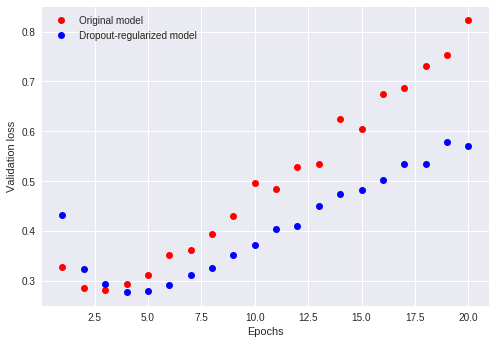

In [35]:
dpt_model_val_loss = dpt_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'ro', label='Original model')
plt.plot(epochs, dpt_model_val_loss, 'bo', label='Dropout-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()